In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generating our dataset

np.random.seed(42)

# Generate 983 normal data points (x and y between 10 and 50)
x_normal = np.random.randint(10, 51, 983)
y_normal = np.random.randint(10, 51, 983)

# Generate 17 outliers (x and y outside the range 100-200)
x_outliers = np.random.randint(100, 201, 17)
y_outliers = np.random.randint(100, 201, 17)

# Combine
x = np.concatenate([x_normal, x_outliers])
y = np.concatenate([y_normal, y_outliers])

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Shuffle the dataset so outliers aren't all at the end
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
df.head()

,x,y
0,25,13
1,13,50
2,34,45
3,14,22
4,35,41


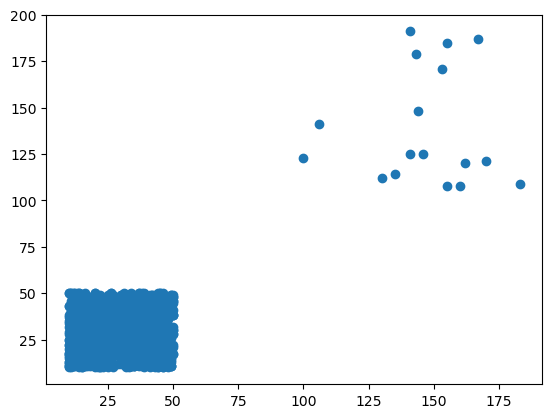

In [4]:
plt.scatter(x=x, y=y)

In [60]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(contamination=0.017)
clf.fit(df)
predictions=clf.predict(df)

In [61]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [62]:
outlier_index=np.where(predictions==-1)
outlier_index

(array([ 27,  86, 112, 133, 173, 231, 251, 388, 399, 475, 518, 561, 618,
        662, 792, 899, 941]),)

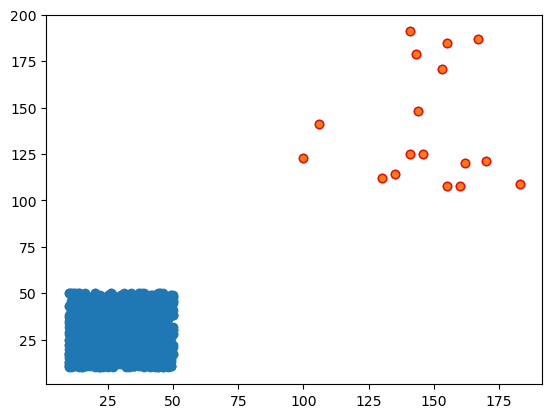

In [63]:
x=df.values
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[outlier_index,0], x[outlier_index,1], edgecolors="r")